### 기존 데이터를 변형하여 새로운 데이터를 만들어내는 방법
    - 다양한 이미지 변환 방식을 데이터에 적용하여 모델에 입력
    - 수집 데이터가 적은 경우 더욱 높은 정확도
    - 많은 연구 진행중
   
    • width_shift_range: 임의의 크기만큼 너비 방향으로 이동
    → 0.2이고 이미지의 너비가 100이라면, -20~+20의 범위에서 너비 방향으로 이동
    
    • height_shift_range: 임의의 크기만큼 높이 방향으로 이동
    → 0.2이고 이미지의 높이가 100이라면, -20~+20의 범위에서 높이 방향으로 이동
    
    • brightness_range: 이미지의 밝기 정도를 조정
    → (0.5, 1.5)이면 원본 대비 최대 50%의 비율로 어둡거나 밝게 조절
    
    • shear_range: 시계 반대 방향으로 밀림 강도를 조절
    → 0.5이면, 최대 50%의 비율로 시계 반대 방향으로 기울어지게
    
    • zoom_range: 임의의 비율만큼 이미지를 확대/축소시킴
    → 0.5이면, 0.5~1.5배의 범위에서 이미지의 크기를 조절
    
    • rotation_range: 이미지를 임의로 회전시킴
    → 180이라면, 0~180의 범위에서 임의로 이미지를 회전
    
    • rescale: 이미지 픽셀값의 크기를 조절
    → 1/255이면, 각 픽셀값에 해당 값이 곱해짐
    
    • fill_mode: 이미지 변환 시에 새로 생기는 픽셀을 채울 방법을 결정
    → ["nearest”, “constant”, “reflect or wrap"]
    
    • horizontal_flip: True일 경우, 임의로 이미지를 수평 방향으로 뒤집음
    
    • vertical_flip: True일 경우, 임의로 이미지를 수직 방향으로 뒤집음
    
    • preprocessing_function:사용자 정의 전처리 함수 또는 전처리 함수를 적용

In [18]:
from tensorflow.python.client import device_lib

In [19]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13778672632060790327
 xla_global_id: -1]

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.datasets import cifar10

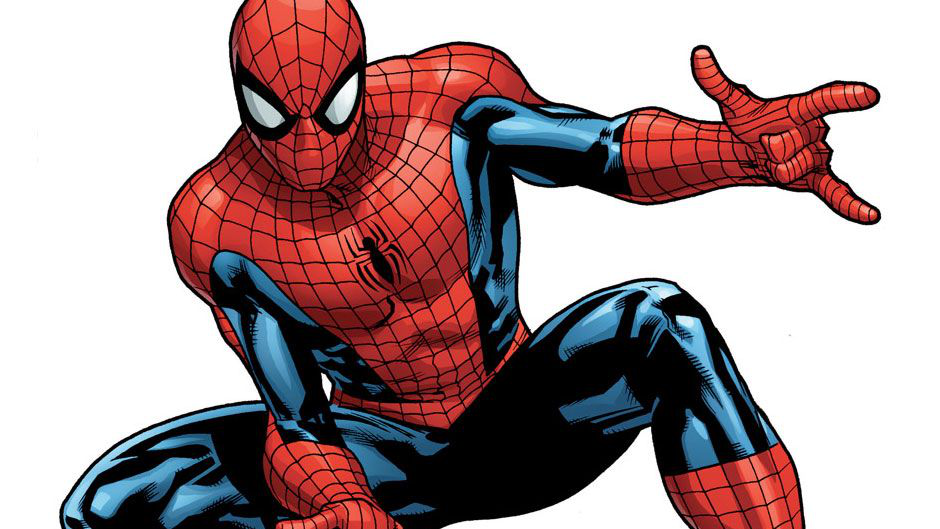

In [2]:
s = load_img('image/s.jpg')
s

In [12]:
train_datagen = ImageDataGenerator( rescale = 1./255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest'
                                  )

In [15]:
# type(s)
imgarr = img_to_array(s)/255
imgarr = imgarr.reshape(1, 529, 940, 3)
imgarr.shape

(1, 529, 940, 3)

In [16]:
tgen = train_datagen.flow(imgarr) #하나의 이미지만 사용

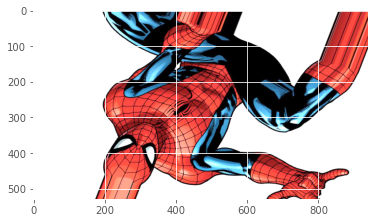

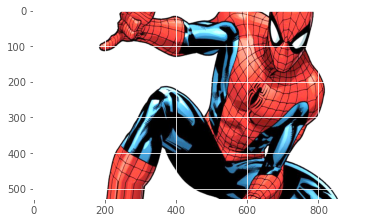

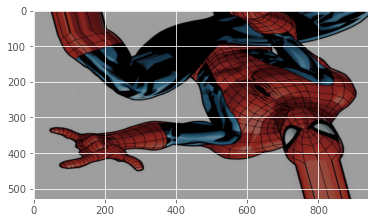

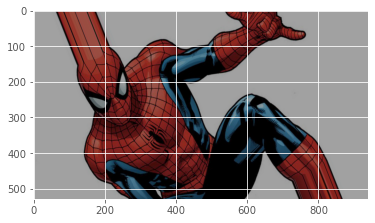

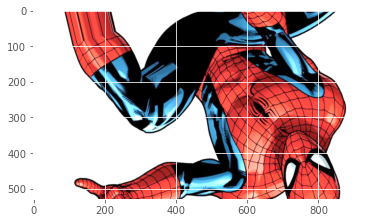

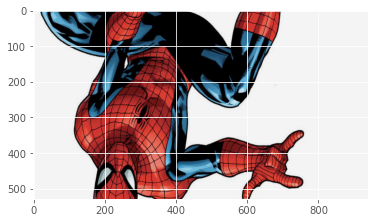

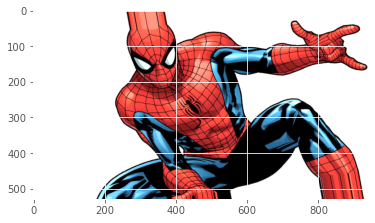

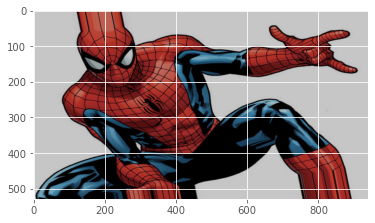

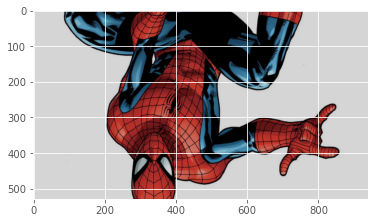

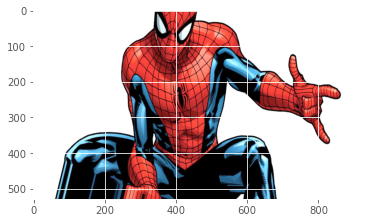

In [17]:
for n in range(10):
    img = tgen.next()
    plt.imshow(img[0])
    plt.show()